In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,AveragePooling2D,Conv2D,MaxPool2D,Dropout,Flatten
import tensorflow

In [2]:
ds_train=tfds.load(name="rock_paper_scissors",split="train")
ds_test=tfds.load(name="rock_paper_scissors",split="test")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteVBYT90/rock_paper_scissors-train.tfrecord*…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteVBYT90/rock_paper_scissors-test.tfrecord*.…

Dataset rock_paper_scissors downloaded and prepared to ~/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [3]:
train_images = np.array([data['image'].numpy() for data in ds_train])

train_labels = np.array([data['label'].numpy() for data in ds_train])

test_images = np.array([data['image'].numpy() for data in ds_test])

test_labels = np.array([data['label'].numpy() for data in ds_test])

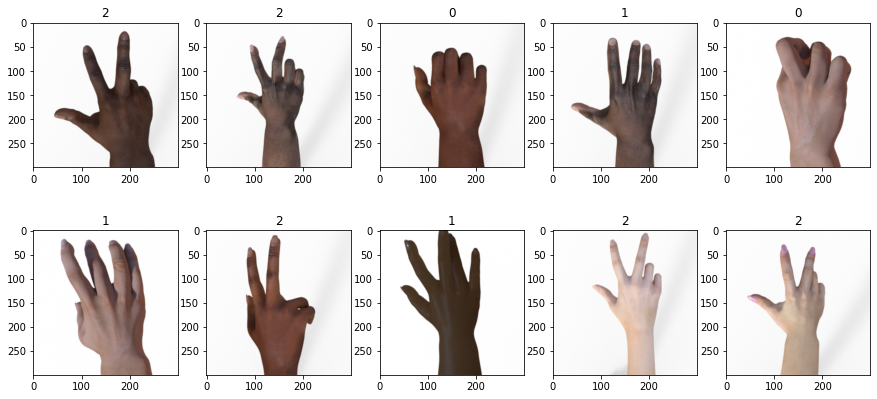

In [4]:
fig = plt.figure(figsize=(15,7))
for i in range(10):
  fig.add_subplot(2,5,i+1)
  plt.imshow(train_images[i])
  plt.title(train_labels[i])

plt.show()

In [5]:
train_images = train_images.mean(axis=3)
test_images  = test_images.mean(axis=3)

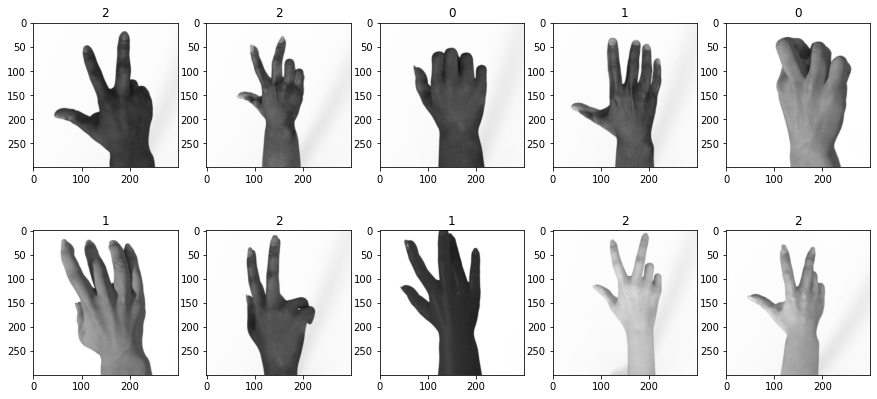

In [6]:
fig = plt.figure(figsize=(15,7))
for i in range(10):
  fig.add_subplot(2,5,i+1)
  plt.imshow(train_images[i], cmap='gray' , vmin=0 , vmax=255)
  plt.title(train_labels[i])

plt.show()

In [7]:
train_images.shape , train_labels.shape , test_images.shape , test_labels.shape

((2520, 300, 300), (2520,), (372, 300, 300), (372,))

In [8]:
train_images = train_images.reshape((train_images.shape[0],train_images.shape[1],train_images.shape[2],1))
train_labels = train_labels.reshape((train_labels.shape[0],1))

test_images = test_images.reshape((test_images.shape[0],test_images.shape[1],test_images.shape[2],1))
test_labels = test_labels.reshape((test_labels.shape[0],1))

In [9]:
train_images = np.divide(train_images,255)
test_images  = np.divide(test_images,255)

In [10]:
def test_accuracy(model):
  test_predict  = model.predict(test_images)
  test_res = np.argwhere(test_predict==np.amax(test_predict,1, keepdims=True))
  test_res = test_res[:,1].reshape((test_res.shape[0],1))
  acc = 1 - (np.count_nonzero(np.subtract(test_res,test_labels))/test_res.shape[0])
  return acc

Model 1 : basic -> 1 CONV2D layer , batch_size = 64 , units = 64

In [11]:
model1 = Sequential()
model1.add(AveragePooling2D(pool_size=(3,3) , strides=3 , input_shape=(300, 300, 1))) # output shape => (300 - 3 ) / 3  + 1 = 100
model1.add(Conv2D(16, 3, activation='relu'))
model1.add(Flatten())
model1.add(Dense(128 , activation='relu'))
model1.add(Dense(3 , activation='softmax'))

model1.compile(optimizer='adam',loss= tensorflow.keras.losses.SparseCategoricalCrossentropy() , metrics=['accuracy'])
history1 = model1.fit(train_images,train_labels,epochs = 10 , batch_size = 16)

Epoch 1/10
158/158 [==============================] - 9s 11ms/step - loss: 0.7032 - accuracy: 0.8540
Epoch 2/10
158/158 [==============================] - 2s 10ms/step - loss: 0.0301 - accuracy: 0.9960
Epoch 3/10
158/158 [==============================] - 2s 14ms/step - loss: 0.0090 - accuracy: 0.9988
Epoch 4/10
158/158 [==============================] - 2s 10ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 5/10
158/158 [==============================] - 2s 10ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 6/10
158/158 [==============================] - 2s 10ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 7/10
158/158 [==============================] - 2s 10ms/step - loss: 7.3154e-04 - accuracy: 1.0000
Epoch 8/10
158/158 [==============================] - 2s 10ms/step - loss: 5.9057e-04 - accuracy: 1.0000
Epoch 9/10
158/158 [==============================] - 2s 10ms/step - loss: 4.6823e-04 - accuracy: 1.0000
Epoch 10/10
158/158 [==============================] - 2s 10ms/step - loss: 3.6

In [12]:
test_accuracy(model1)

12/12 [==============================] - 0s 10ms/step


0.7258064516129032

Change Number of Units

In [15]:
model2 = Sequential()
model2.add(AveragePooling2D(pool_size=(3,3) , strides=3 , input_shape=(300, 300, 1)))
model2.add(Conv2D(64, 3, activation='relu'))
model2.add(Flatten())
model2.add(Dense(128 , activation='relu'))
model2.add(Dense(3 , activation='softmax'))

model2.compile(optimizer='adam',loss= tensorflow.keras.losses.SparseCategoricalCrossentropy() , metrics=['accuracy'])
history2 = model2.fit(train_images,train_labels,epochs = 10 , batch_size = 16)

Epoch 1/10
158/158 [==============================] - 5s 28ms/step - loss: 2.2471 - accuracy: 0.8143
Epoch 2/10
158/158 [==============================] - 4s 28ms/step - loss: 0.0317 - accuracy: 0.9960
Epoch 3/10
158/158 [==============================] - 4s 27ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 4/10
158/158 [==============================] - 4s 28ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 5/10
158/158 [==============================] - 4s 28ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 6/10
158/158 [==============================] - 4s 28ms/step - loss: 9.9371e-04 - accuracy: 1.0000
Epoch 7/10
158/158 [==============================] - 4s 28ms/step - loss: 7.5717e-04 - accuracy: 1.0000
Epoch 8/10
158/158 [==============================] - 4s 28ms/step - loss: 5.4114e-04 - accuracy: 1.0000
Epoch 9/10
158/158 [==============================] - 4s 27ms/step - loss: 4.1788e-04 - accuracy: 1.0000
Epoch 10/10
158/158 [==============================] - 4s 28ms/step - loss:

In [16]:
test_accuracy(model2)

12/12 [==============================] - 0s 12ms/step


0.75

Change number of layers

In [17]:
model3 = Sequential()
model3.add(AveragePooling2D(pool_size=(3,3) , strides=3 , input_shape=(300, 300, 1)))
model3.add(Conv2D(64, 3, activation='relu'))
model3.add(Conv2D(32, 3, activation='relu'))
model3.add(MaxPool2D(pool_size=(3,3) , strides=3))
model3.add(Flatten())
model3.add(Dense(128 , activation='relu'))
model3.add(Dense(3 , activation='softmax'))

model3.compile(optimizer='adam',loss= tensorflow.keras.losses.SparseCategoricalCrossentropy() , metrics=['accuracy'])
history3 = model3.fit(train_images,train_labels,epochs = 10 , batch_size = 16)

Epoch 1/10
158/158 [==============================] - 3s 15ms/step - loss: 0.3309 - accuracy: 0.8671
Epoch 2/10
158/158 [==============================] - 2s 15ms/step - loss: 0.0199 - accuracy: 0.9940
Epoch 3/10
158/158 [==============================] - 3s 16ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 4/10
158/158 [==============================] - 2s 15ms/step - loss: 3.7476e-04 - accuracy: 1.0000
Epoch 5/10
158/158 [==============================] - 2s 15ms/step - loss: 1.7786e-04 - accuracy: 1.0000
Epoch 6/10
158/158 [==============================] - 2s 15ms/step - loss: 1.3172e-04 - accuracy: 1.0000
Epoch 7/10
158/158 [==============================] - 2s 15ms/step - loss: 9.5808e-05 - accuracy: 1.0000
Epoch 8/10
158/158 [==============================] - 2s 15ms/step - loss: 7.7068e-05 - accuracy: 1.0000
Epoch 9/10
158/158 [==============================] - 2s 15ms/step - loss: 6.3875e-05 - accuracy: 1.0000
Epoch 10/10
158/158 [==============================] - 2s 15ms/step

In [18]:
test_accuracy(model3)

12/12 [==============================] - 0s 19ms/step


0.771505376344086

Change batch size

In [35]:
model4 = Sequential()
model4.add(AveragePooling2D(pool_size=(3,3) , strides=3 , input_shape=(300, 300, 1)))
model4.add(Conv2D(64, 3, activation='relu'))
model4.add(Conv2D(32, 3, activation='relu'))
model4.add(MaxPool2D(pool_size=(3,3) , strides=3))
model4.add(Flatten())
model4.add(Dense(128 , activation='relu'))
model4.add(Dense(3 , activation='softmax'))

model4.compile(optimizer='adam',loss= tensorflow.keras.losses.SparseCategoricalCrossentropy() , metrics=['accuracy'])
history4 = model4.fit(train_images,train_labels,epochs = 10 , batch_size = 64)

Epoch 1/10
40/40 [==============================] - 3s 51ms/step - loss: 0.6636 - accuracy: 0.7310
Epoch 2/10
40/40 [==============================] - 2s 53ms/step - loss: 0.0650 - accuracy: 0.9857
Epoch 3/10
40/40 [==============================] - 2s 49ms/step - loss: 0.0189 - accuracy: 0.9956
Epoch 4/10
40/40 [==============================] - 2s 49ms/step - loss: 0.0116 - accuracy: 0.9980
Epoch 5/10
40/40 [==============================] - 2s 49ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 6/10
40/40 [==============================] - 2s 55ms/step - loss: 8.6766e-04 - accuracy: 1.0000
Epoch 7/10
40/40 [==============================] - 2s 49ms/step - loss: 5.9608e-04 - accuracy: 1.0000
Epoch 8/10
40/40 [==============================] - 2s 48ms/step - loss: 4.6456e-04 - accuracy: 1.0000
Epoch 9/10
40/40 [==============================] - 2s 49ms/step - loss: 4.0841e-04 - accuracy: 1.0000
Epoch 10/10
40/40 [==============================] - 2s 49ms/step - loss: 3.4339e-04 - accura

In [36]:
test_accuracy(model4)

12/12 [==============================] - 0s 13ms/step


0.825268817204301

In [34]:
from tensorflow.keras import backend as K
import gc
gc.collect()
K.clear_session()

In [67]:
def loss_plot(history,label):
  loss = history.history['loss']
  plt.clf()
  x = np.linspace(0,len(loss),len(loss))
  plt.plot(x,loss,'black',label="Loss of "+label)
  plt.legend()

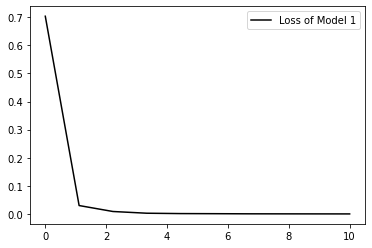

In [68]:
loss_plot(history1,"Model 1")

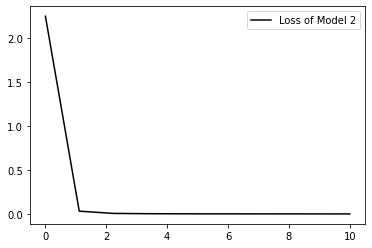

In [69]:
loss_plot(history2,"Model 2")

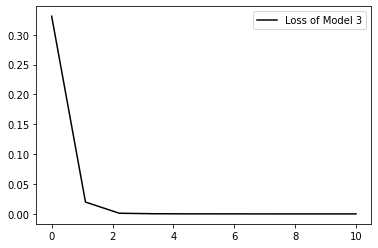

In [70]:
loss_plot(history3,"Model 3")

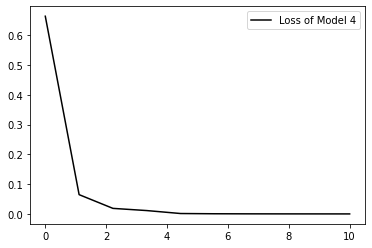

In [71]:
loss_plot(history4,"Model 4")